Categorical Columns: Index(['sex', 'age_group'], dtype='object')
Accuracy: 0.89
F1 Score: 0.89
Precision: 0.88
Recall: 0.91
ROC-AUC Score: 0.92

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



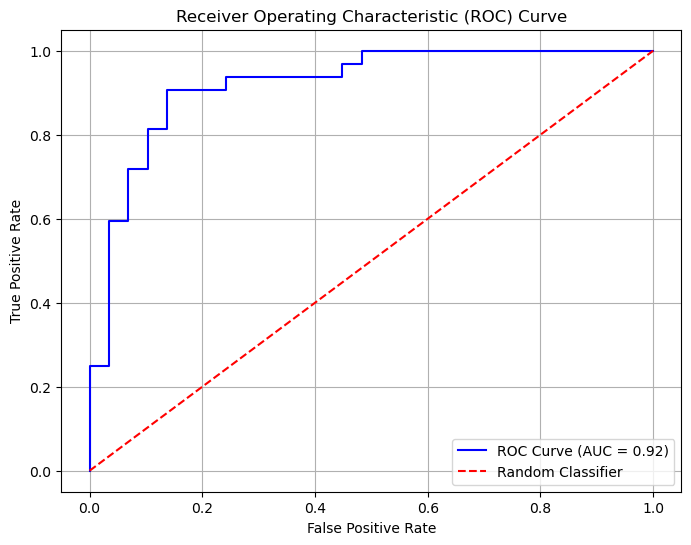


Prediction for new data: No Heart Disease

Prediction for new data: Heart Disease Present


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
)
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_disease_cleaned_enhanced.csv') 

#  categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Encode categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Independent (X) and Dependent Variables (y)
X = df_encoded.drop(columns=['Target'])  # Use all features except the target
y = df_encoded['Target']  # Target variable

# Split the dataset into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#  new data based on the feature structure of the encoded dataset
new_data_template = pd.DataFrame(columns=X.columns)
new_data_template.loc[0] = 0  # Initialize all features to 0

# new data with specific values for prediction
new_data_template['age'] = 50
new_data_template['chol'] = 220
new_data_template['oldpeak'] = 1.5
new_data_template['ca'] = 2
new_data_template['max_heart_rate'] = 150
new_data_template['sex_Male'] = 1  #  Male
new_data_template['thal'] = 6 


# Scale the new data
new_data_scaled = scaler.transform(new_data_template)

# Predict the outcome
prediction = model.predict(new_data_scaled)
print("\nPrediction for new data:", "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease")

# data  with values indicating higher likelihood of heart disease
new_data_template['age'] = 67  # Older age
new_data_template['chol'] = 300  # High cholesterol
new_data_template['oldpeak'] = 3.5  # Severe ischemic changes
new_data_template['ca'] = 3  # Increased number of major vessels with blockages
new_data_template['max_heart_rate'] = 110  # Lower maximum heart rate
new_data_template['sex_Male'] = 1  #Male
new_data_template['thal'] = 7  # Reversible defect

# Scale the new data
new_data_scaled = scaler.transform(new_data_template)

# Predict the outcome
prediction = model.predict(new_data_scaled)
print("\nPrediction for new data:", "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease")

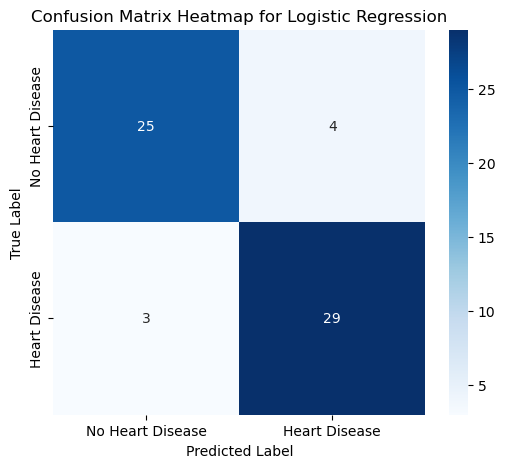

In [10]:
import seaborn as sns

# Plot Confusion Matrix as Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix Heatmap for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()